In [189]:
import json
import numpy as np
import spacy
!python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/Users/nicolasparra/.local/share/virtualenvs/whale_and_jaguar_project-Rmx8L3Xy/lib/python3.8/site-packages/en_core_web_sm
-->
/Users/nicolasparra/.local/share/virtualenvs/whale_and_jaguar_project-Rmx8L3Xy/lib/python3.8/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [213]:
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel #LDA model gensim
import matplotlib.pyplot as plt

In [191]:
news = {}
for index,line in enumerate(open('../data/News_Category_Dataset_v2.json', 'r')):
    news[index]=json.loads(line)

In [192]:
textos = [news[k]['headline']+'. '+news[k]['short_description'] for k in news.keys()]
categorias = [news[k]['category'] for k in news.keys()]
df = pd.DataFrame({'Textos':textos,'category':categorias})

In [193]:
nlp = spacy.load('en')
stop_words = nlp.Defaults.stop_words

In [194]:
from spacy.tokenizer import Tokenizer
nlp = spacy.load('en')
tokenizer = Tokenizer(nlp.vocab)

In [195]:
def cleanse(texto):
    token = tokenizer(texto)
    msk = [not str(tok) in stop_words for tok in token] 
    tokens = np.array([str(tok).replace(".","").replace('(',"").replace(')',"").replace('?',"") for tok in token])[msk]
    doc = nlp(" ".join(tokens))
    sentence = []
    for tok in doc:
        lem = tok.lemma_ 
        if lem == '-PRON-':
            pass
        else:
            sentence.append(lem)
    return sentence

In [196]:
lematizado=[]
for k in range(df.shape[0]):
    vector_lema = cleanse(df.Textos.iloc[k])
    lematizado.append(vector_lema)

In [197]:
common_dictionary = Dictionary(lematizado)
common_corpus = [common_dictionary.doc2bow(text) for text in lematizado]

In [199]:
num_topics = len(np.unique(df.category.values))

In [200]:
#Cantidad de Temas los que trae el DATAFRAME
num_topics = num_topics
# Entrenando el modelo del corpus
lda = LdaModel(common_corpus, num_topics=num_topics, minimum_probability=0.0, iterations=50)

#Calculando los vectores de probabilidad
vec_proba = [lda[text] for text in common_corpus]

In [201]:
topics = [max(vec, key = lambda i : i[1])[0] for vec in vec_proba]

In [202]:
df['Prediction'] = topics

In [203]:
df.head()

Textos       category  \
0  There Were 2 Mass Shootings In Texas Last Week...          CRIME   
1  Will Smith Joins Diplo And Nicky Jam For The 2...  ENTERTAINMENT   
2  Hugh Grant Marries For The First Time At Age 5...  ENTERTAINMENT   
3  Jim Carrey Blasts 'Castrato' Adam Schiff And D...  ENTERTAINMENT   
4  Julianna Margulies Uses Donald Trump Poop Bags...  ENTERTAINMENT   

   Prediction  
0          26  
1          30  
2          39  
3          37  
4          25

In [217]:
np.unique(categorias)

array(['ARTS', 'ARTS & CULTURE', 'BLACK VOICES', 'BUSINESS', 'COLLEGE',
       'COMEDY', 'CRIME', 'CULTURE & ARTS', 'DIVORCE', 'EDUCATION',
       'ENTERTAINMENT', 'ENVIRONMENT', 'FIFTY', 'FOOD & DRINK',
       'GOOD NEWS', 'GREEN', 'HEALTHY LIVING', 'HOME & LIVING', 'IMPACT',
       'LATINO VOICES', 'MEDIA', 'MONEY', 'PARENTING', 'PARENTS',
       'POLITICS', 'QUEER VOICES', 'RELIGION', 'SCIENCE', 'SPORTS',
       'STYLE', 'STYLE & BEAUTY', 'TASTE', 'TECH', 'THE WORLDPOST',
       'TRAVEL', 'WEDDINGS', 'WEIRD NEWS', 'WELLNESS', 'WOMEN',
       'WORLD NEWS', 'WORLDPOST'], dtype='<U14')

In [208]:
my_prediction = df.Prediction.values

<BarContainer object of 40 artists>

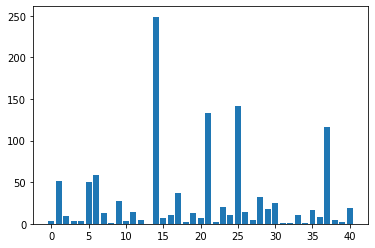

In [221]:
unique, counts = np.unique(my_prediction[list(np.where(df.category.values == 'COLLEGE')[0])], return_counts=True)
plt.bar(x=unique,height=counts)

In [228]:
from sklearn.metrics.cluster import adjusted_mutual_info_score

# Mutual information

In [230]:
print('The mutal information bewteen the prediction and the target is',adjusted_mutual_info_score(list(df.Prediction.values),list(df.category.values)))

The mutal information bewteen the prediction and the target is 0.06170225061695745


#### I don't use a supervised model, I think the idea is find our classification

In [226]:

adjusted_rand_score(['Gato','Gato','Perro','Perro'], [0, 0, 1, 1])

1.0

In [232]:
news[0]

{'category': 'CRIME',
 'headline': 'There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV',
 'authors': 'Melissa Jeltsen',
 'link': 'https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89',
 'short_description': 'She left her husband. He killed their children. Just another day in America.',
 'date': '2018-05-26'}